In [1]:
### LIb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [11]:
import warnings
warnings.filterwarnings(action='ignore')

In [16]:
%matplotlib inline

## DataSet
* https://www.kaggle.com/srolka/ecommerce-customers

In [2]:
data = pd.read_csv('data/Ecommerce Customers.csv')

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
#checking more statstical info
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Working with only numeric column

In [6]:
#checking the time used in app and how much spend on yearly

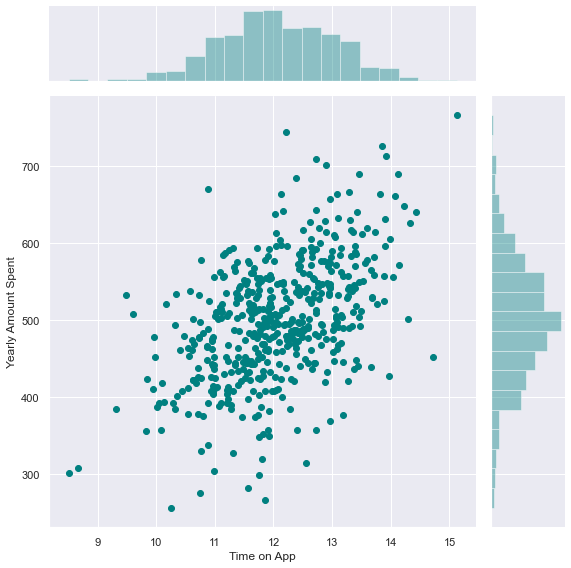

In [26]:

sns.jointplot(data=data,x='Time on App', y ='Yearly Amount Spent',color='teal',height=8);


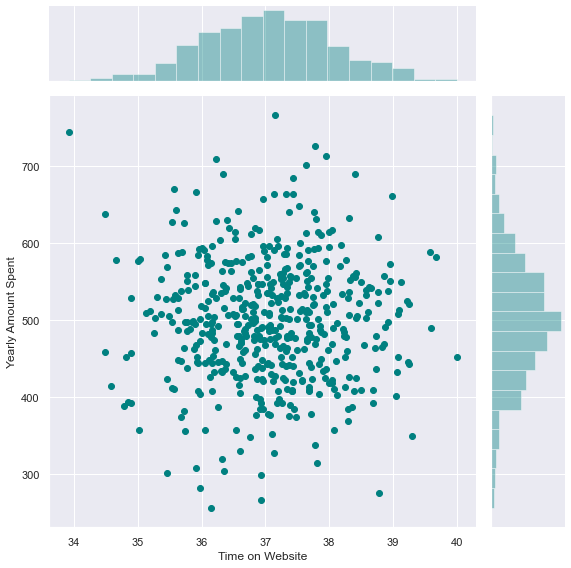

In [27]:
#checking for the website too

sns.jointplot(data=data,x='Time on Website', y ='Yearly Amount Spent',color='teal',height=8);

In [23]:
## Checking the time spend on app and the membership column

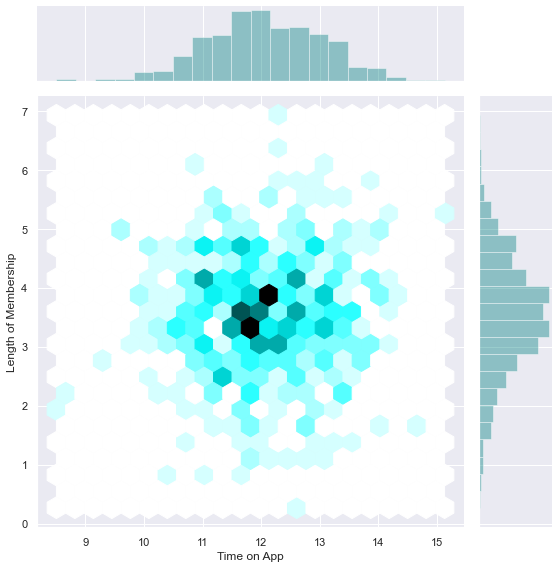

In [25]:
sns.jointplot(data=data,x='Time on App', y ='Length of Membership',kind='hex',color='teal',height=8);

In [28]:
#checking all of the pairplot for numeric columns

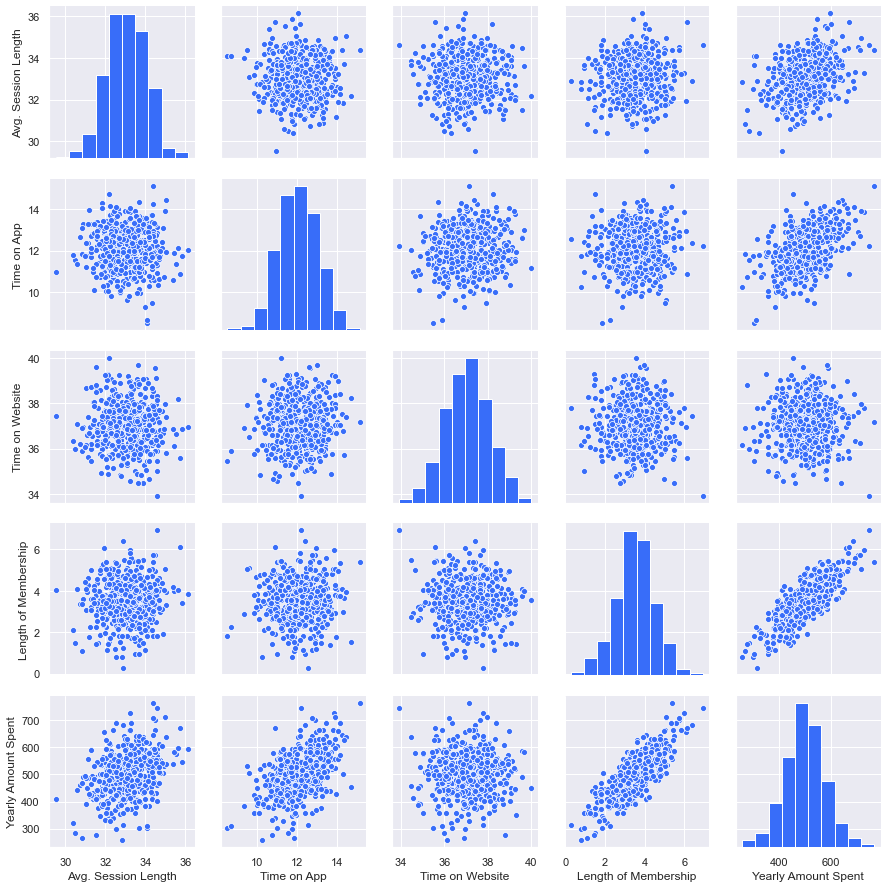

In [31]:
sns.pairplot(data);

In [32]:
#based on the pairplot we can see ['Length of the Membership'] column has more corelated with the ['Yearly AMount Spent'] column

In [33]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [34]:
#['Yearly Amount Spent'] has 0.80 corelation with the ['Length of Membership']

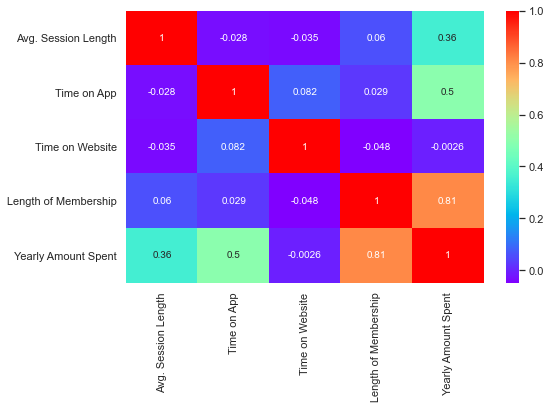

In [46]:
plt.figure(figsize=(8,5));
sns.heatmap(data.corr(),cmap='rainbow',annot=True);



In [47]:
#checking LM Plot

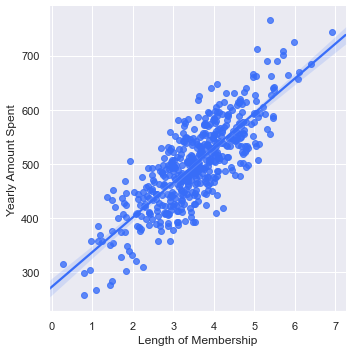

In [48]:
sns.lmplot(x='Length of Membership', y ='Yearly Amount Spent', data= data);

### Creating Train and Test data

In [51]:
featured_x = data.iloc[:,3:].drop('Yearly Amount Spent',axis=1)

In [53]:
featured_x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [54]:
target_y = data['Yearly Amount Spent']

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y,test_size=0.2,random_state=123)


#### Sklearn Model Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
#Finding the pattern
model.fit(x_train,y_train)

LinearRegression()

In [59]:
#checking the accuracy
model.score(x_test,y_test)

0.985102142468002

### Coef

In [60]:
linear_coef = model.coef_

In [61]:
linear_coef

array([25.53668806, 38.8657142 ,  0.47939571, 61.52388337])

#### intercpet

In [62]:
linear_intercept = model.intercept_
linear_intercept

-1048.2761649672218

### Predicting with the test data

In [64]:
y_preds = model.predict(x_test)

In [65]:
y_preds

array([451.38398317, 449.77706451, 565.2656488 , 506.77747831,
       389.73672334, 584.38982581, 638.62297012, 479.52450859,
       313.47145608, 395.58032405, 433.88282938, 598.43141401,
       512.76036046, 448.76932011, 337.43385486, 513.37221174,
       507.98112963, 422.06579871, 576.2693436 , 559.34776416,
       445.59436202, 478.27371571, 473.54958527, 620.09485076,
       481.31007681, 407.21767052, 540.49702453, 544.74833471,
       538.37952145, 450.87624285, 475.53934179, 548.15472946,
       542.93337133, 349.93989974, 574.05957452, 429.51098884,
       500.82723374, 340.43555939, 488.95508746, 576.86419269,
       523.54284563, 441.29835008, 572.05265916, 499.86519294,
       473.10542221, 507.82964831, 451.74263125, 570.55706118,
       703.09972189, 619.29089674, 457.66778966, 481.27964843,
       561.37612884, 642.11307124, 532.02389872, 500.63134781,
       615.59917798, 692.994591  , 494.05681354, 457.09124435,
       381.59398391, 432.95853176, 456.3683521 , 458.09

#### checking the predciting with scatter plot

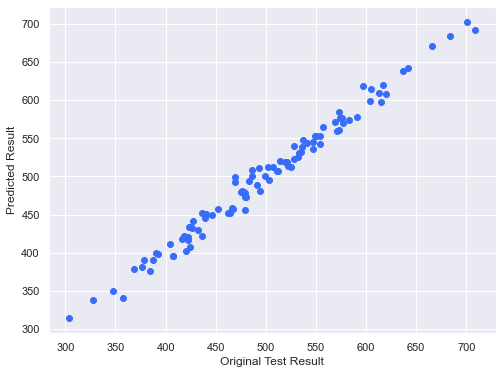

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_preds)

plt.xlabel('Original Test Result')
plt.ylabel('Predicted Result')
plt.show()

### Evaluate the model with metrics
* For more info about metrics
 * https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [69]:
def linear_metrics(y_test,y_preds):
    mae = mean_absolute_error(y_test,y_preds)
    mse = mean_squared_error(y_test,y_preds)
    rmse = np.sqrt(mean_squared_error(y_test,y_preds))
    
    print(f' Means Absolute Error: {mae} \n Mean Squared Error: {mse} \n Root Mean Squared Error: {rmse}')

In [70]:
linear_metrics(y_test,y_preds)

 Means Absolute Error: 8.133367589895201 
 Mean Squared Error: 102.39552323796688 
 Root Mean Squared Error: 10.119067310674778


 # Evaluate the model using coef

In [72]:
coef_data = pd.DataFrame(linear_coef,featured_x.columns,columns=['Coef'])
coef_data

,Coef
Avg. Session Length,25.536688
Time on App,38.865714
Time on Website,0.479396
Length of Membership,61.523883


In [73]:
#for 1 unit change the App will earn 38 dollar
#for 1 unit change the website will earn .47 cents